<a href="https://colab.research.google.com/github/avviiiral/Bank-Note-Authentication-using-Random-Forest/blob/main/MNIST_Digit_Classification_with_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Dependencies

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)

from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.math import confusion_matrix

loading the MNIST data from keras


In [45]:
(X_train , Y_train),(X_test, Y_test) = mnist.load_data()

In [46]:
type(X_train)

numpy.ndarray

shape of numpy array


In [47]:
print(X_train.shape , Y_train.shape ,X_test.shape , Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data : 60,000 images ,
Test data : 10,000 images

In [48]:
# Printing 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [49]:
print(X_train[10].shape)

(28, 28)


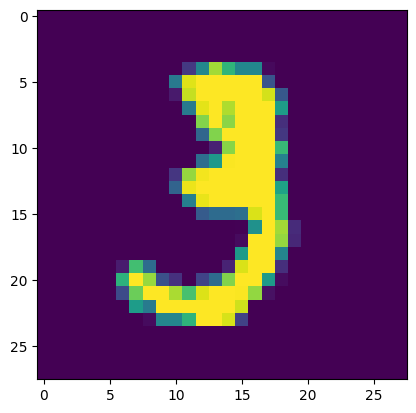

3


In [50]:
# Displaying image

plt.imshow(X_train[10])
plt.show()

# Print the corresponding label
print(Y_train[10])

Image Label


In [51]:
print(Y_train.shape , Y_test.shape)

(60000,) (10000,)


In [52]:
# Unique Value
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


We can use labels as suchor we can also apply One Shot Encoding

All the images have the same dimenstions in the dataset, if not, we have to realize all the images to a commondimention

In [53]:
# scaling the value
X_train = X_train/255
X_test = X_test/255

In [54]:
# printing the 10th image
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building Neural Network

In [55]:
# Setting up the layers of the Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compiling the neural network


In [56]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

 Training the Neural network

In [57]:
model.fit(X_train, Y_train ,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8568 - loss: 0.5047
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9559 - loss: 0.1468
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9689 - loss: 0.1050
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9755 - loss: 0.0827
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9802 - loss: 0.0669
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9834 - loss: 0.0571
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9859 - loss: 0.0489
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9881 - loss: 0.0422
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9894 - loss: 0.0368
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9902 - loss: 0.0318


Training data Accuracy : 98.9%

In [58]:
# test data
loss , accuracy = model.evaluate(X_test , Y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9663 - loss: 0.1338


test data accuracy : 96.8%

In [59]:
print(X_test.shape)

(10000, 28, 28)


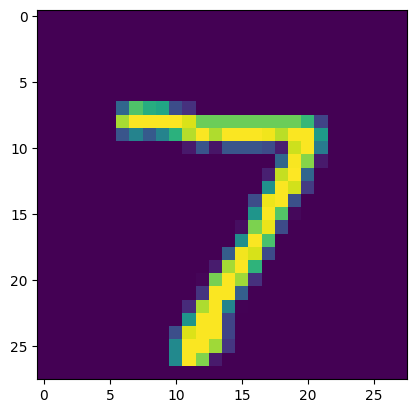

In [60]:
# First data point in X_test
plt.imshow(X_test[0])
plt.show()

In [61]:
print(Y_test[0])

7


In [62]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [63]:
print(Y_pred.shape)

(10000, 10)


In [64]:
print(Y_pred[0])

[3.7802449e-05 1.0648836e-02 9.2950028e-01 9.8204529e-01 7.6141733e-09
 1.4561202e-04 2.4589119e-15 1.0000000e+00 6.6535047e-04 9.9008852e-01]


model.predict() gives the prediction probability of each class

In [65]:
# converting prediction probability to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [66]:
# converting the prediction probability to class label for all test data points

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [67]:
# confusin matrix

conf_mat = confusion_matrix(Y_test, Y_pred_labels)


In [68]:
print(conf_mat)

tf.Tensor(
[[ 942    0    2    1    1    4    3    1    4   22]
 [   0 1107    3    2    0    1    5    9    6    2]
 [   3    0  988    8    3    0    6   13   11    0]
 [   0    0    3  985    0    1    0    9    5    7]
 [   0    0    3    0  944    2    1    4    2   26]
 [   1    0    0   17    2  855    3    0    9    5]
 [   4    2    0    1    9    9  930    1    2    0]
 [   0    1    7    1    1    0    0 1004    2   12]
 [   1    0    2    5    3    4    1    4  946    8]
 [   0    1    0    1   10    1    0    5    3  988]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Label')

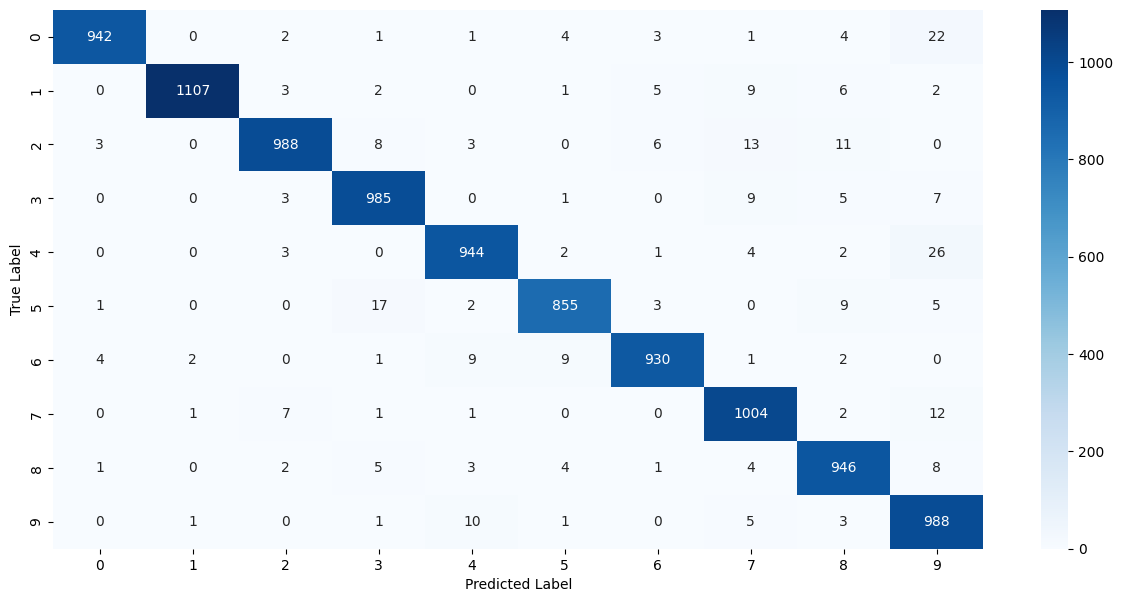

In [69]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat , annot=True , fmt = 'd', cmap='Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

Building a predictive system

In [70]:
input_image_path = '/content/MNIST_digit.png'

input_image = cv2.imread(input_image_path)

In [71]:
type(input_image)

numpy.ndarray

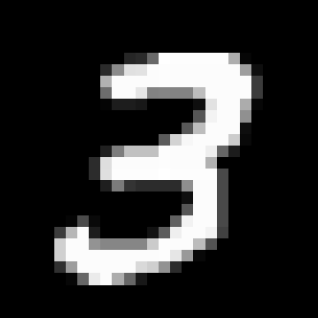

In [72]:
cv2_imshow(input_image)

In [73]:
input_image.shape

(318, 318, 3)

In [74]:
# We have to convert this image into grey scale image and after that we have to reshape this image
grayscale = cv2.cvtColor(input_image , cv2.COLOR_RGB2GRAY)

In [75]:
grayscale.shape    #converted into gray scale image thats y no 3

(318, 318)

In [76]:
# resizing
input_image_resize = cv2.resize(grayscale , (28,28))

In [77]:
input_image_resize.shape

(28, 28)

In [78]:
cv2_imshow(input_image_resize)

In [79]:
input_image_resize = input_image_resize/255

In [80]:
# reshape
image_reshape = np.reshape(input_image_resize , [1,28,28])

In [81]:
input_pred = model.predict(image_reshape)
print(input_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[[1.1819736e-17 4.3394766e-06 2.7198730e-06 1.0000000e+00 7.8938668e-15
  1.8612579e-03 5.2050695e-27 1.7903373e-04 4.2350423e-02 9.9168998e-01]]


In [82]:
input_pred_label = np.argmax(input_pred)

In [83]:
print(input_pred_label)

3


**Predictive system**

In [ ]:
input_image_path = input("Enter path of image: ")

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image , cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale , (28,28))

input_image_resize = input_image_resize/255

image_reshape = np.reshape(input_image_resize , [1,28,28])

input_pred = model.predict(image_reshape)

input_pred_label = np.argmax(input_pred)

input_pred_label = np.argmax(input_pred)

print("The handwriten Digit is recognized as :",input_pred_label)